 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_path = r'Resources/whale_returns.csv'
whale_returns = pd.read_csv(whale_path,parse_dates=True,infer_datetime_format=True,index_col='Date').sort_values(by = 'Date')
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns = whale_returns.dropna()
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_path = r'Resources/algo_returns.csv'
algo_returns = pd.read_csv(algo_path,parse_dates=True,infer_datetime_format=True,index_col='Date').sort_values(by = 'Date')
algo_returns.sample(10)

,Algo 1,Algo 2
Date,,
2017-07-10,-0.002043,-0.001211
2017-11-29,-0.000707,0.001267
2016-06-15,-0.001871,0.002348
2015-07-15,-0.009468,-0.004188
2018-02-26,-0.001839,0.005430
2014-07-17,-0.009030,-0.008056
2016-04-06,-0.008743,0.009941
2016-07-06,-0.003491,0.005598
2017-03-27,-0.000368,0.001724


In [6]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns = algo_returns.dropna()
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_path = r'Resources/sp500_history.csv'
sp500_closing_price = pd.read_csv(sp500_path,infer_datetime_format=True,parse_dates=True,index_col='Date').sort_values(by = 'Date')
sp500_closing_price.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [9]:
# Check Data Types
sp500_closing_price.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp500_closing_price['Close'] = sp500_closing_price['Close'].str.replace('$','')
sp500_closing_price['Close'] = sp500_closing_price['Close'].astype('float')
sp500_closing_price.dtypes

Close    float64
dtype: object

In [11]:
# Calculate Daily Returns
sp500_daily_return = sp500_closing_price.pct_change()
sp500_daily_return

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [12]:
# Drop nulls
sp500_daily_return.dropna(inplace=True)
sp500_daily_return.isnull().sum()

Close    0
dtype: int64

In [13]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_return.rename(columns={'Close':'SP500 Close'},inplace=True)
sp500_daily_return.head()

,SP500 Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
all_returns = pd.concat([whale_returns,algo_returns,sp500_daily_return],axis='columns',join='inner')
all_returns.head(20)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,-0.016961
2015-03-11,0.004012,0.005163,0.003312,-0.001147,0.002994,0.000605,-0.001918
2015-03-12,0.008265,0.010272,0.013117,0.010801,-0.002935,0.011667,0.012601
2015-03-13,-0.002497,-0.001428,-0.003697,-0.008142,-0.005423,-0.005062,-0.006075


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:ylabel='Frequency'>

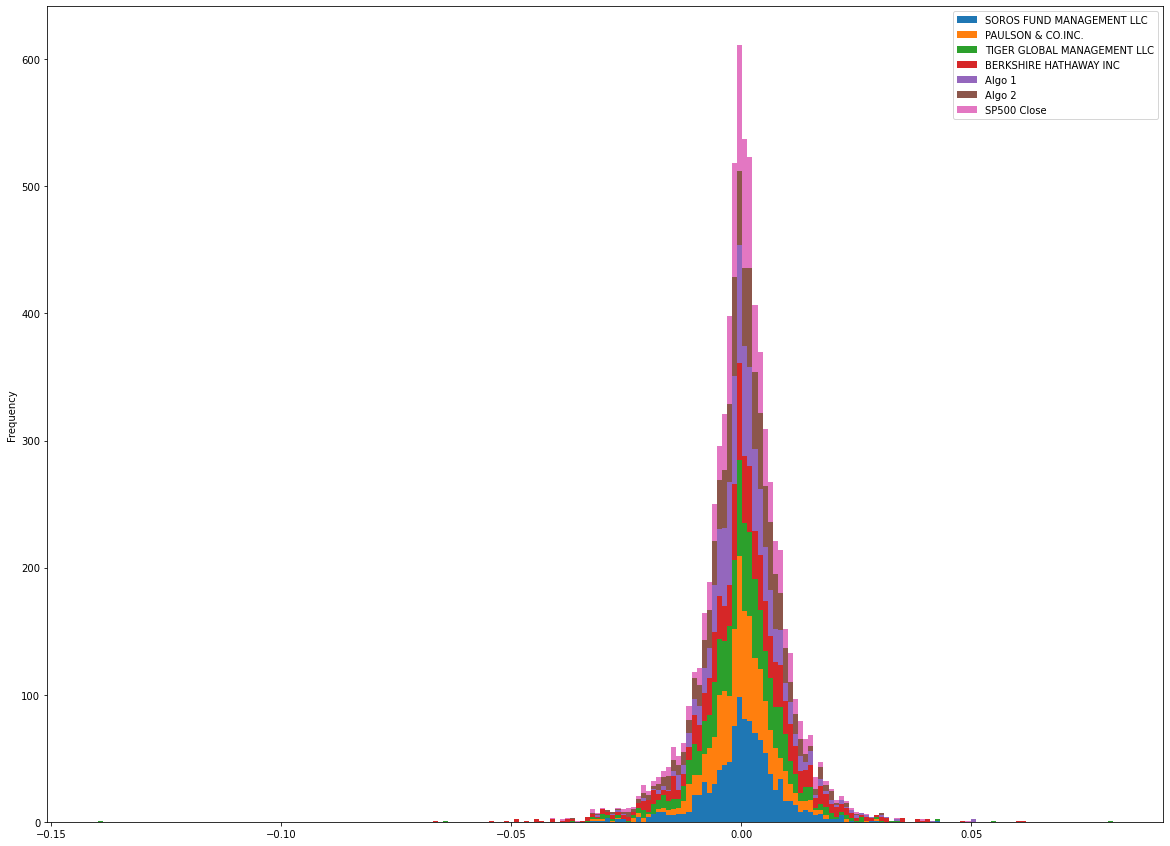

In [15]:
# Plot daily returns of all portfolios
all_returns.plot.hist(stacked = True,bins = 200,figsize = (20 , 15))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

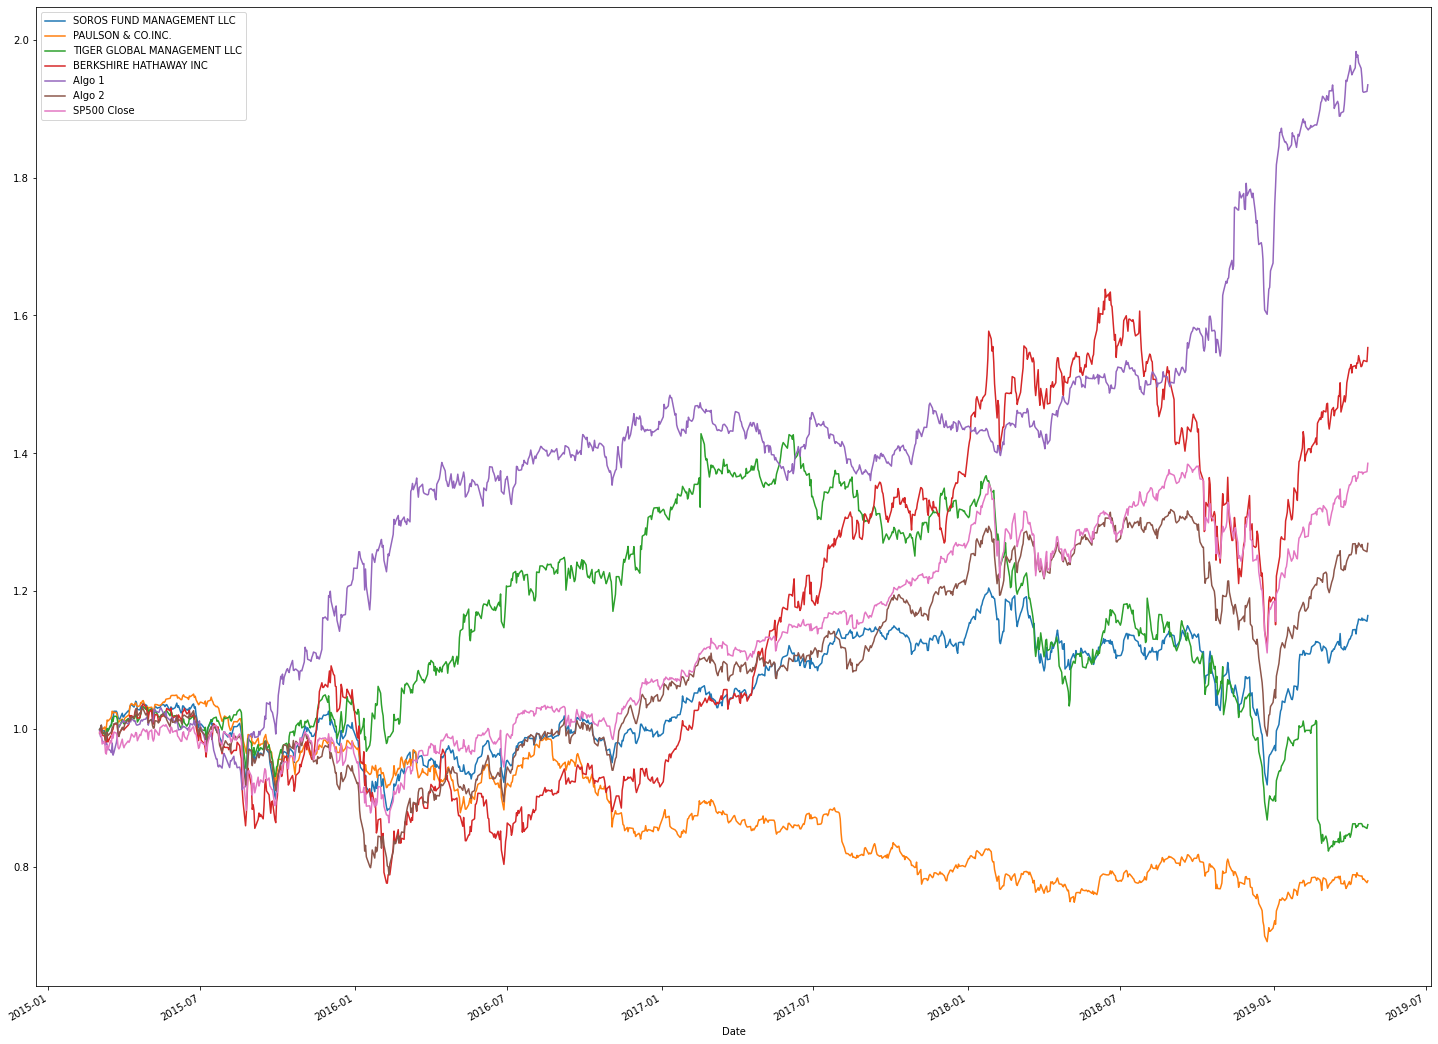

In [16]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + all_returns).cumprod()

# Plot cumulative returns
cumulative_returns.plot(figsize = (25 , 20))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

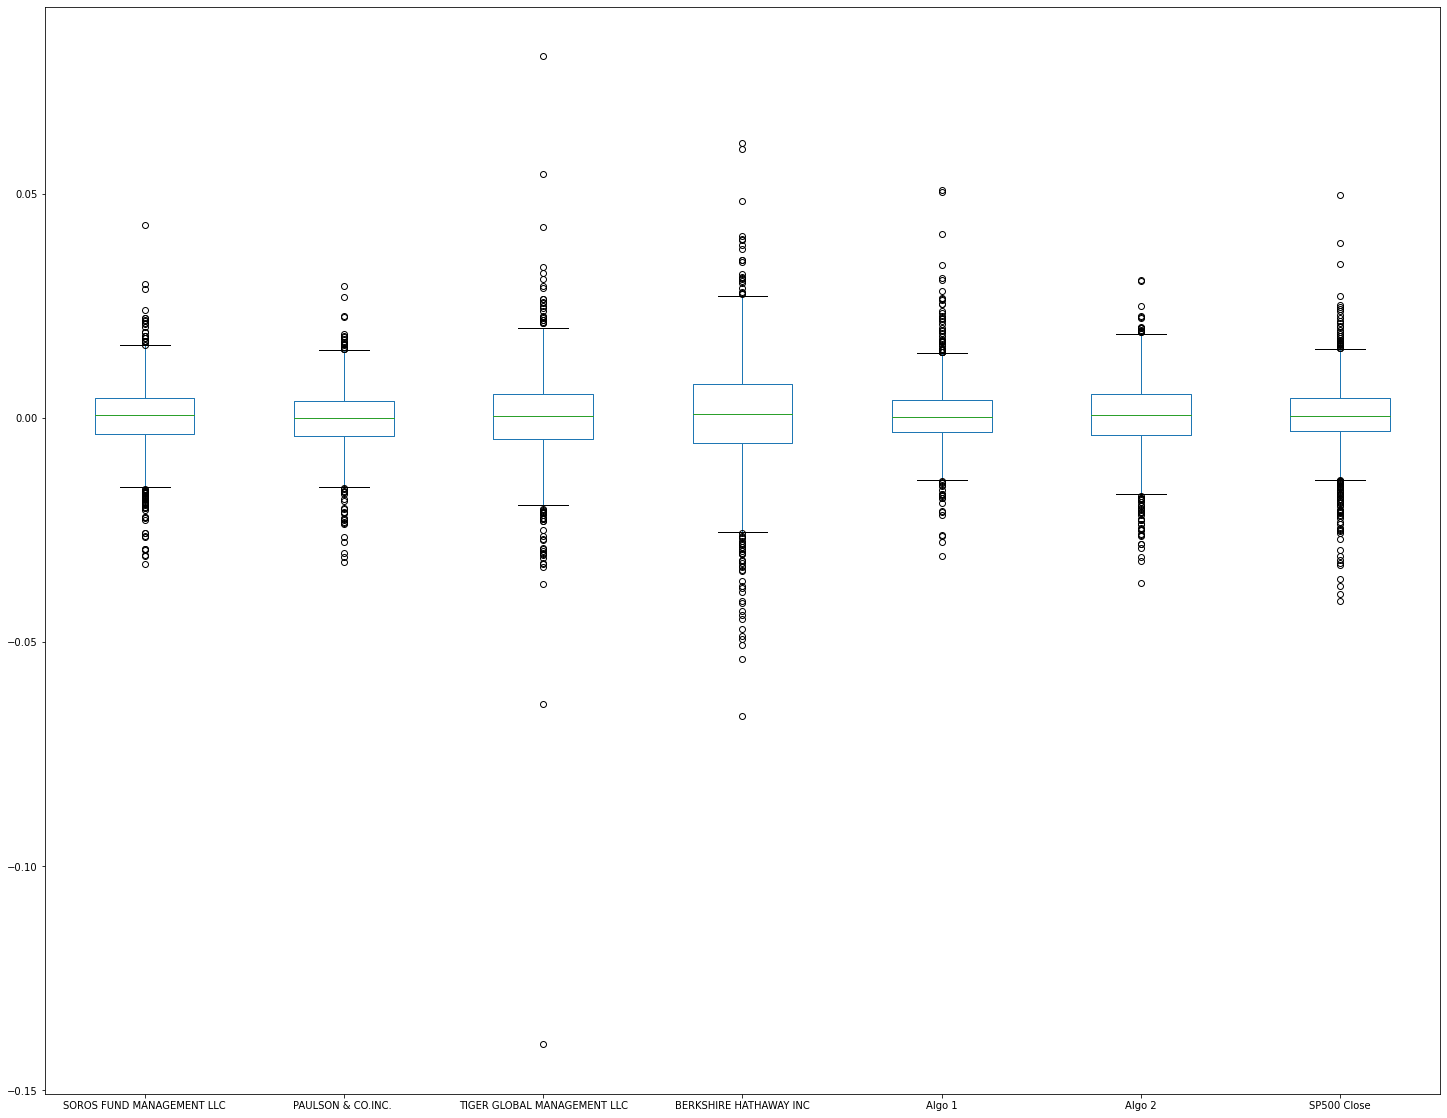

In [17]:
# Box plot to visually show risk
all_returns.plot(kind = 'box',figsize = (25,20))

### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios
all_returns_std = all_returns.std()
all_returns_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
SP500 Close                    0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [19]:
# Calculate  the daily standard deviation of S&P 500
# I calculated it above no?

In [20]:
# Determine which portfolios are riskier than the S&P 500
all_returns_std.sort_values()

PAULSON & CO.INC.              0.007023
Algo 1                         0.007620
SOROS FUND MANAGEMENT LLC      0.007895
Algo 2                         0.008342
SP500 Close                    0.008554
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

### Calculate the Annualized Standard Deviation

In [21]:
# Calculate the annualized standard deviation (252 trading days)
(all_returns_std * np.sqrt(252)).sort_values()

PAULSON & CO.INC.              0.111488
Algo 1                         0.120967
SOROS FUND MANAGEMENT LLC      0.125335
Algo 2                         0.132430
SP500 Close                    0.135786
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

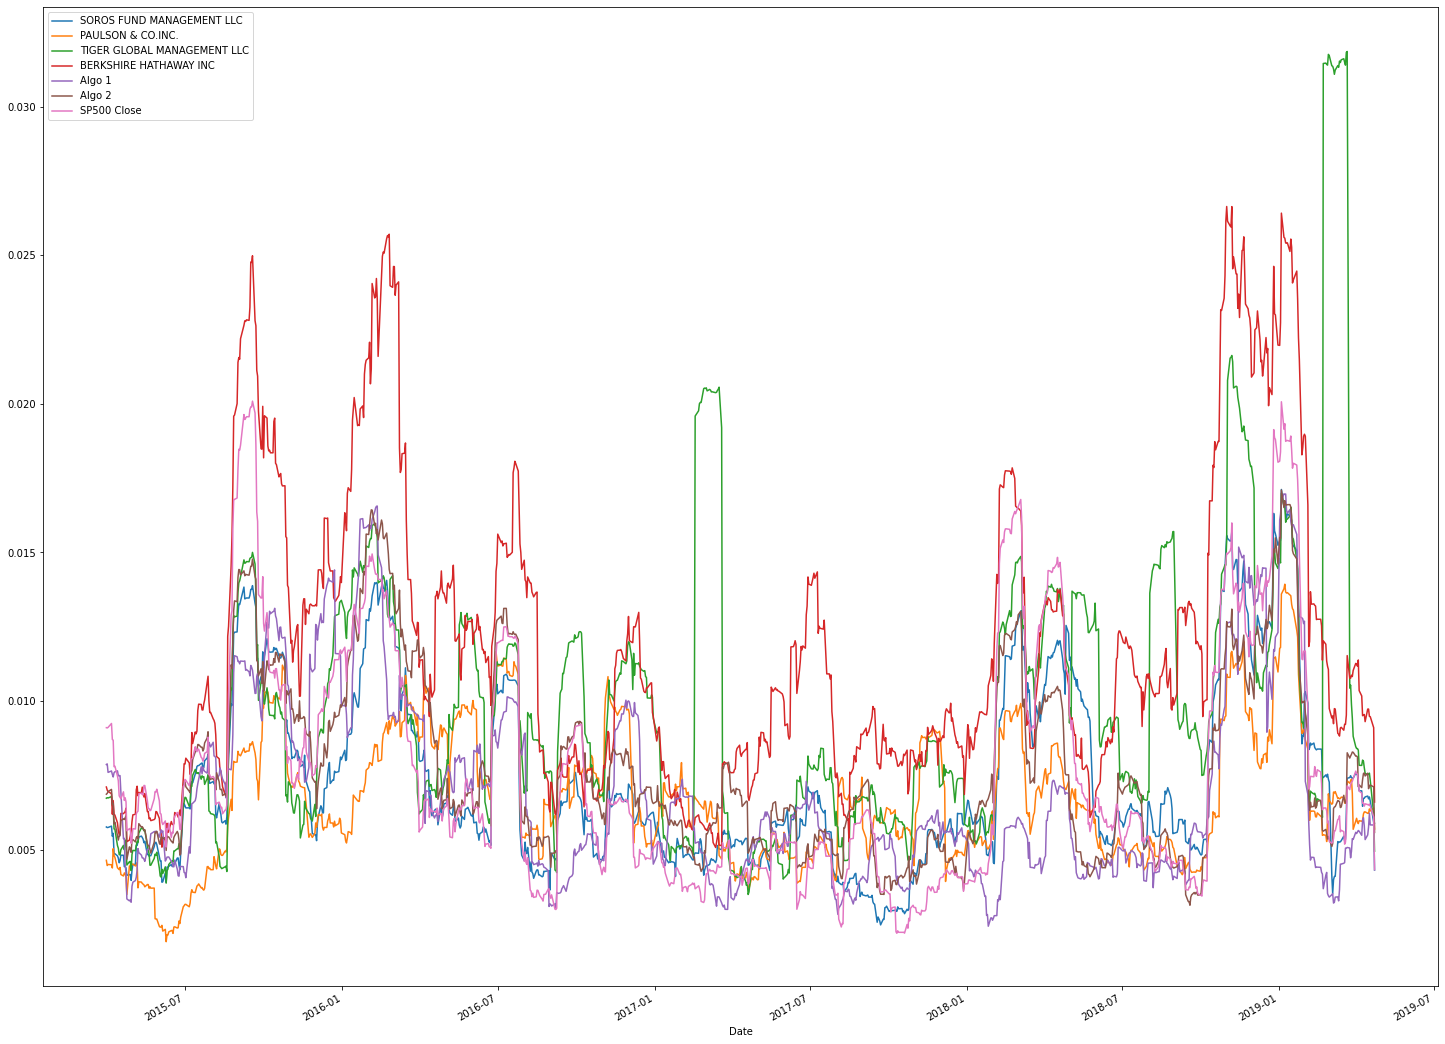

In [22]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
all_returns_rolling_std = all_returns.rolling(window = 21).std()
# Plot the rolling standard deviation
all_returns_rolling_std.plot(figsize = (25 , 20))

### Calculate and plot the correlation

In [23]:
# Calculate the correlation
all_returns_correlation = all_returns.corr()
# Display de correlation matrix
all_returns_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Close
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
SP500 Close,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:xlabel='Date'>

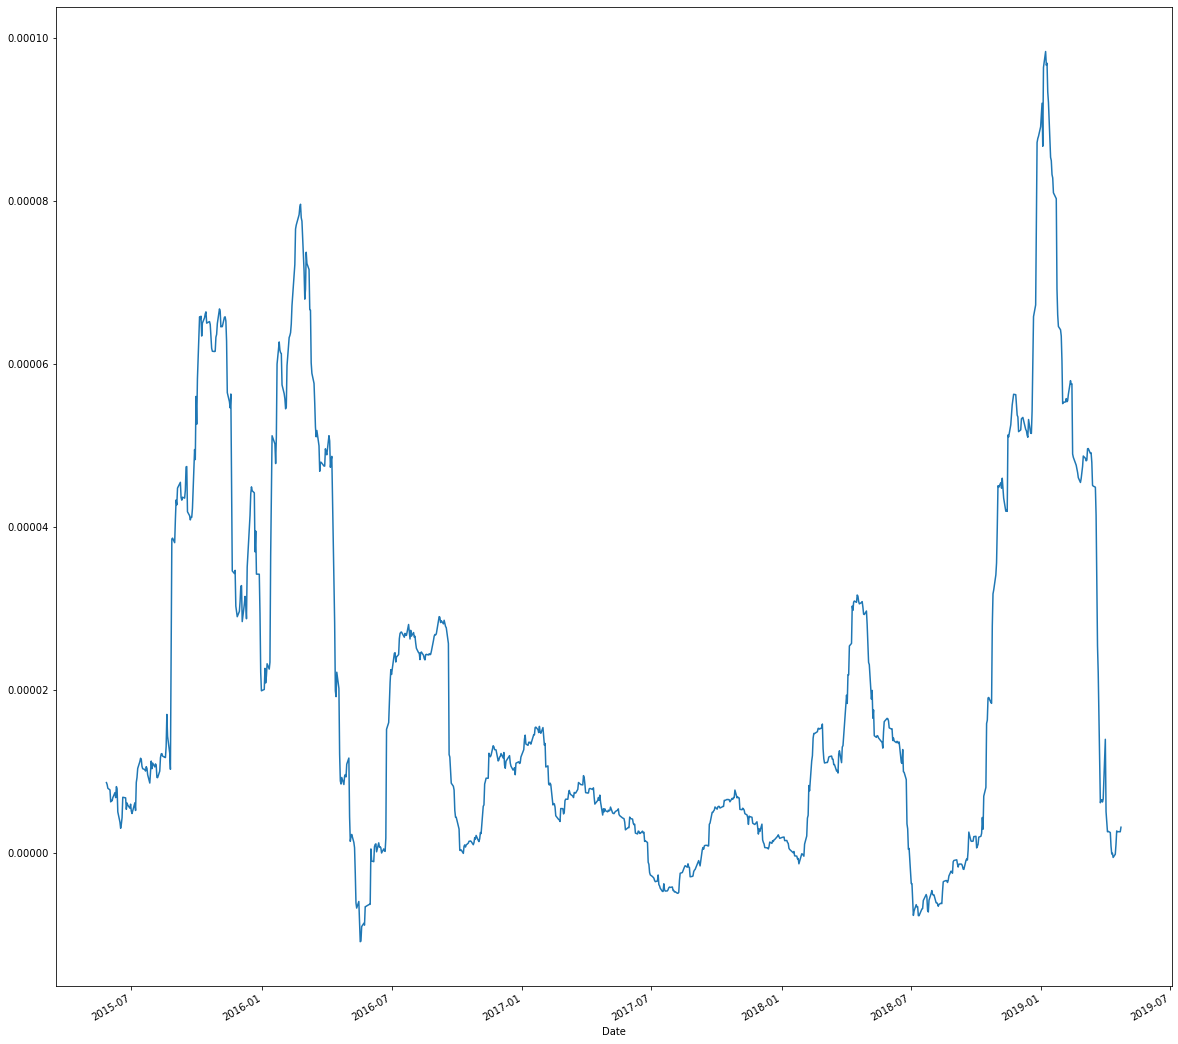

In [24]:
# Calculate covariance of a single portfolio
algo1_covariance = all_returns['Algo 1'].cov(all_returns['SP500 Close'])
# Calculate variance of S&P 500
variance = all_returns['SP500 Close'].var()
# Computing beta
algo1_beta = algo1_covariance / variance
# Plot beta trend
all_returns['Algo 1'].rolling(window = 60).cov(all_returns['SP500 Close']).plot(figsize = (20 , 20))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [25]:
# Use `ewm` to calculate the rolling window
all_returns.ewm(halflife = 21).mean()
all_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [26]:
# Annualized Sharpe Ratios
sharpe_ratios = (all_returns.mean() * 252) / (all_returns.std() * np.sqrt(252))
sharpe_ratios.sort_values()

PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
SOROS FUND MANAGEMENT LLC      0.356417
Algo 2                         0.501364
BERKSHIRE HATHAWAY INC         0.621810
SP500 Close                    0.648267
Algo 1                         1.378648
dtype: float64

<AxesSubplot:>

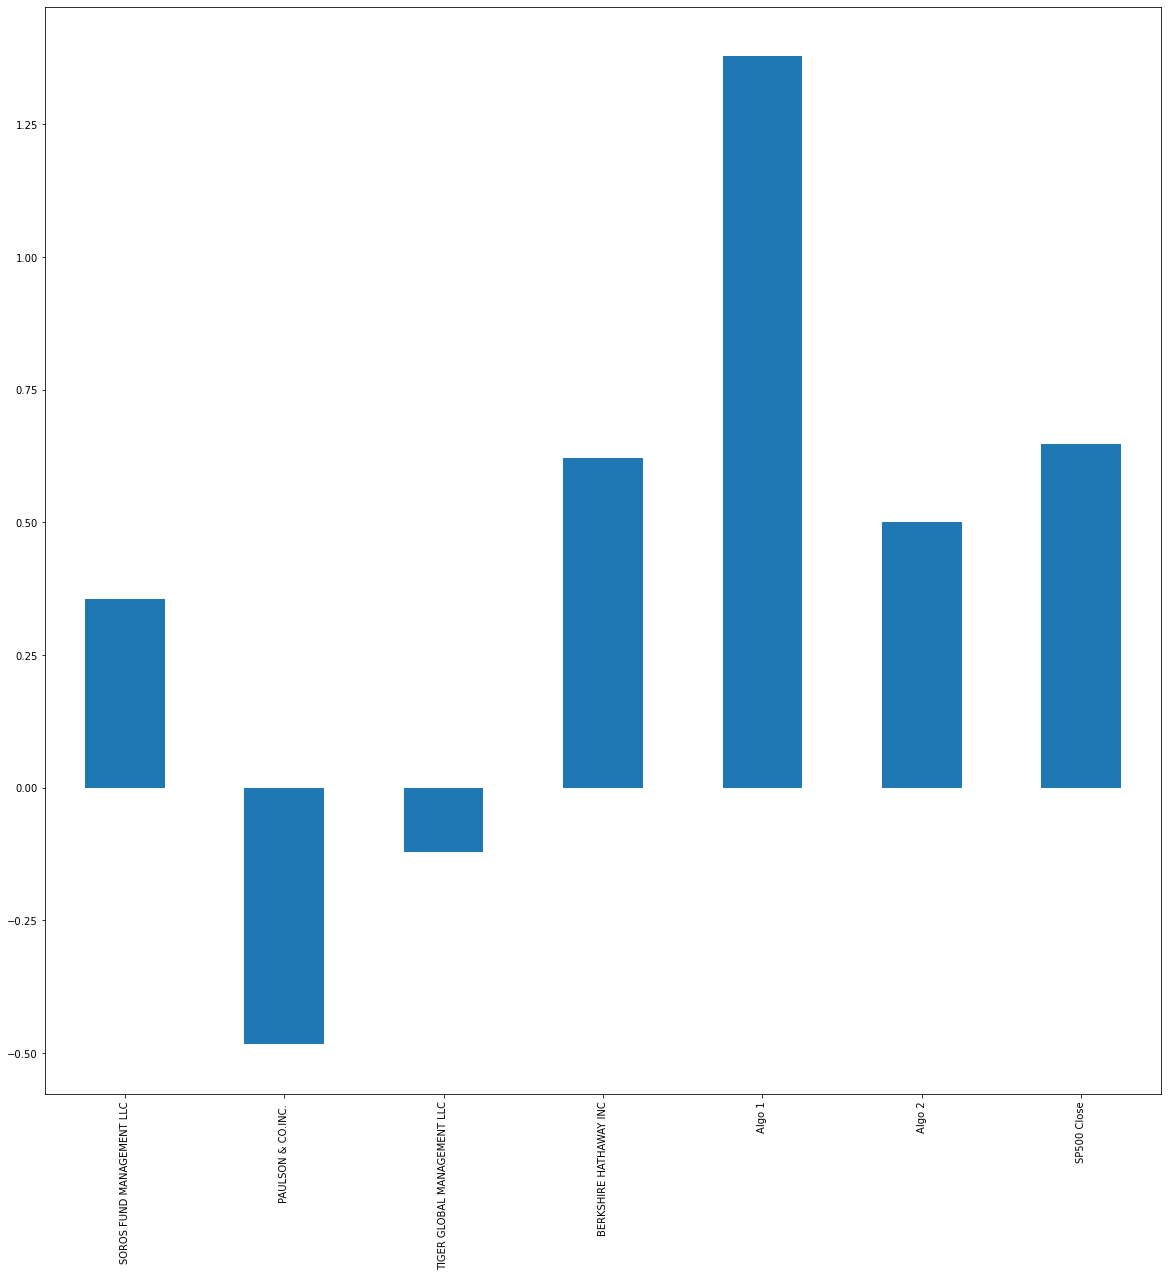

In [27]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = 'bar',figsize = (20 , 20))

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Algorithm 1 outperformed the S&P500 as well as all the other whale portfolios. Unfortunately, Algorithm 2 could not outperform the S&P500; however, it outperformed the majority of the whale portfolios except for Bershire Hathaway's.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [28]:
# Reading data from 1st stock
goog_path = r'Resources/goog_historical.csv'
goog = pd.read_csv(goog_path,parse_dates=True,infer_datetime_format=True,index_col='Trade DATE').sort_index()
goog

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59
...,...,...
2019-05-03,GOOG,1185.40
2019-05-06,GOOG,1189.39
2019-05-07,GOOG,1174.10


In [29]:
# Reading data from 2nd stock
aapl_path = r'Resources/aapl_historical.csv'
aapl = pd.read_csv(aapl_path,parse_dates=True,infer_datetime_format=True,index_col='Trade DATE').sort_index()
aapl

,Symbol,NOCP
Trade DATE,,
2018-05-11,AAPL,188.59
2018-05-14,AAPL,188.15
2018-05-15,AAPL,186.44
2018-05-16,AAPL,188.18
2018-05-17,AAPL,186.99
...,...,...
2019-05-03,AAPL,211.75
2019-05-06,AAPL,208.48
2019-05-07,AAPL,202.86


In [30]:
# Reading data from 3rd stock
cost_path = r'Resources/cost_historical.csv'
cost = pd.read_csv(cost_path,parse_dates=True,infer_datetime_format=True,index_col='Trade DATE').sort_index()
cost

,Symbol,NOCP
Trade DATE,,
2018-05-11,COST,195.76
2018-05-14,COST,195.88
2018-05-15,COST,195.48
2018-05-16,COST,198.71
2018-05-17,COST,199.60
...,...,...
2019-05-03,COST,244.62
2019-05-06,COST,244.23
2019-05-07,COST,240.18


In [31]:
# Combine all stocks in a single DataFrame
all_stonks = pd.concat([goog, aapl, cost], axis = 'rows', join = 'inner')
all_stonks

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59
...,...,...
2019-05-03,COST,244.62
2019-05-06,COST,244.23
2019-05-07,COST,240.18


In [32]:
# Reset Date index
all_stonks.reset_index()


,Trade DATE,Symbol,NOCP
0,2018-05-11,GOOG,1098.26
1,2018-05-14,GOOG,1100.20
2,2018-05-15,GOOG,1079.23
3,2018-05-16,GOOG,1081.77
4,2018-05-17,GOOG,1078.59
...,...,...,...
745,2019-05-03,COST,244.62
746,2019-05-06,COST,244.23
747,2019-05-07,COST,240.18
748,2019-05-08,COST,241.34


In [33]:
# Reorganize portfolio data by having a column per symbol
all_stonks = all_stonks.pivot_table(values = 'NOCP', index = 'Trade DATE', columns = 'Symbol')
all_stonks

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59
...,...,...,...
2019-05-03,211.75,244.62,1185.40
2019-05-06,208.48,244.23,1189.39
2019-05-07,202.86,240.18,1174.10


In [34]:
# Calculate daily returns
all_stonks_daily = all_stonks.pct_change()
# Drop NAs
all_stonks_daily.dropna(inplace = True)
# Display sample data
all_stonks_daily

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339
...,...,...,...
2019-05-03,0.012431,0.007953,0.019602
2019-05-06,-0.015443,-0.001594,0.003366
2019-05-07,-0.026957,-0.016583,-0.012855


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [58]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
port_return = all_stonks_daily.dot(weights)
# Display sample data
port_return

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
                ...   
2019-05-03    0.013329
2019-05-06   -0.004557
2019-05-07   -0.018798
2019-05-08   -0.000547
2019-05-09   -0.001751
Length: 249, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [65]:
# Join your returns DataFrame to the original returns DataFrame
all_summary = pd.concat([all_returns,port_return.rename('My Portfolio')], axis = 'columns', join = 'inner')
all_summary

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Close,My Portfolio
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.006061
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.001545
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,0.001217


In [67]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_summary.dropna(inplace = True)

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [78]:
# Calculate the annualized `std`
(all_summary.mean() * 252) / (all_summary.std() * np.sqrt(252)).sort_values()

Algo 1                         2.035665
Algo 2                         0.080607
BERKSHIRE HATHAWAY INC         0.159756
My Portfolio                   0.933123
PAULSON & CO.INC.              0.258738
SOROS FUND MANAGEMENT LLC      0.430713
SP500 Close                    0.584820
TIGER GLOBAL MANAGEMENT LLC   -1.034216
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

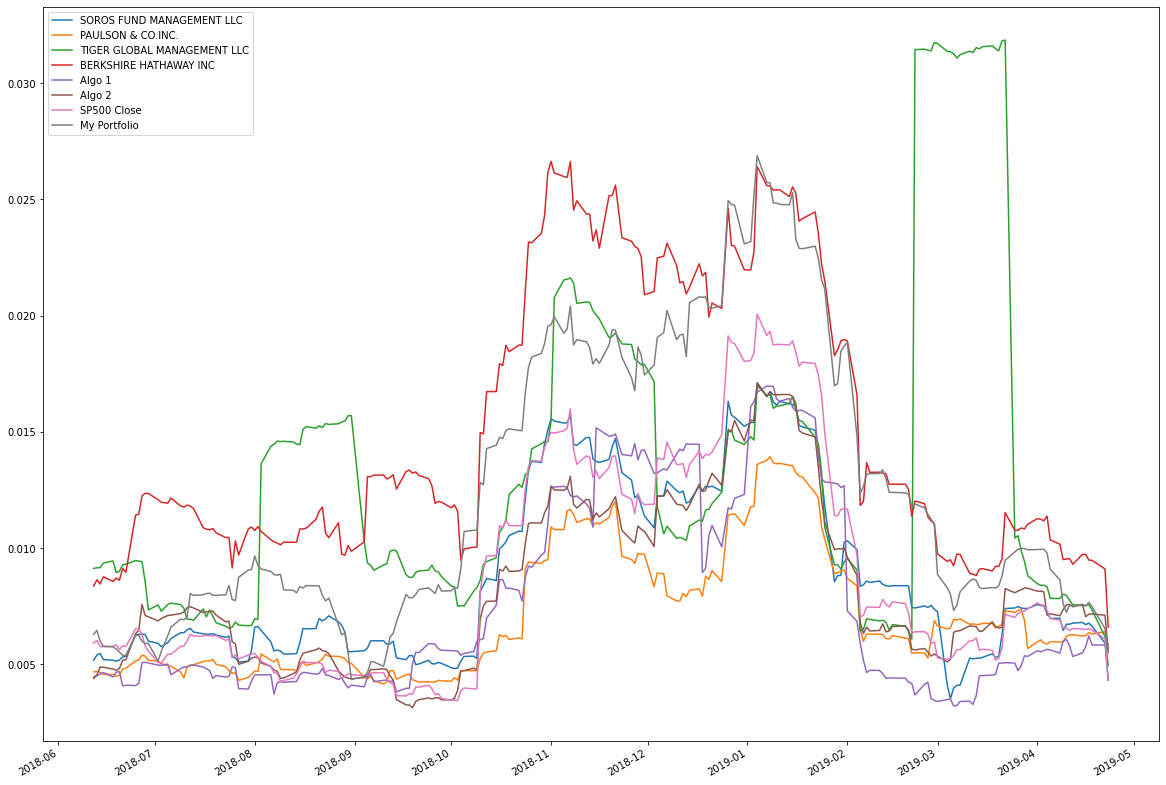

In [69]:
# Calculate rolling standard deviation
all_summ_rolling_std = all_summary.rolling(window = 21).std()

# Plot rolling standard deviation
all_summ_rolling_std.plot(figsize = (20,15))

### Calculate and plot the correlation

In [70]:
# Calculate and plot the correlation
all_summ_corr = all_summary.corr()
all_summ_corr

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Close,My Portfolio
SOROS FUND MANAGEMENT LLC,1.000000,0.791962,0.478627,0.816675,0.337826,0.862846,0.876981,0.733250
PAULSON & CO.INC.,0.791962,1.000000,0.485375,0.650758,0.361301,0.783656,0.766680,0.644210
TIGER GLOBAL MANAGEMENT LLC,0.478627,0.485375,1.000000,0.325457,0.114554,0.409496,0.481030,0.391972
BERKSHIRE HATHAWAY INC,0.816675,0.650758,0.325457,1.000000,0.327000,0.782804,0.852303,0.801158
Algo 1,0.337826,0.361301,0.114554,0.327000,1.000000,0.365512,0.289358,0.261471
Algo 2,0.862846,0.783656,0.409496,0.782804,0.365512,1.000000,0.875721,0.739936
SP500 Close,0.876981,0.766680,0.481030,0.852303,0.289358,0.875721,1.000000,0.871875
My Portfolio,0.733250,0.644210,0.391972,0.801158,0.261471,0.739936,0.871875,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:>

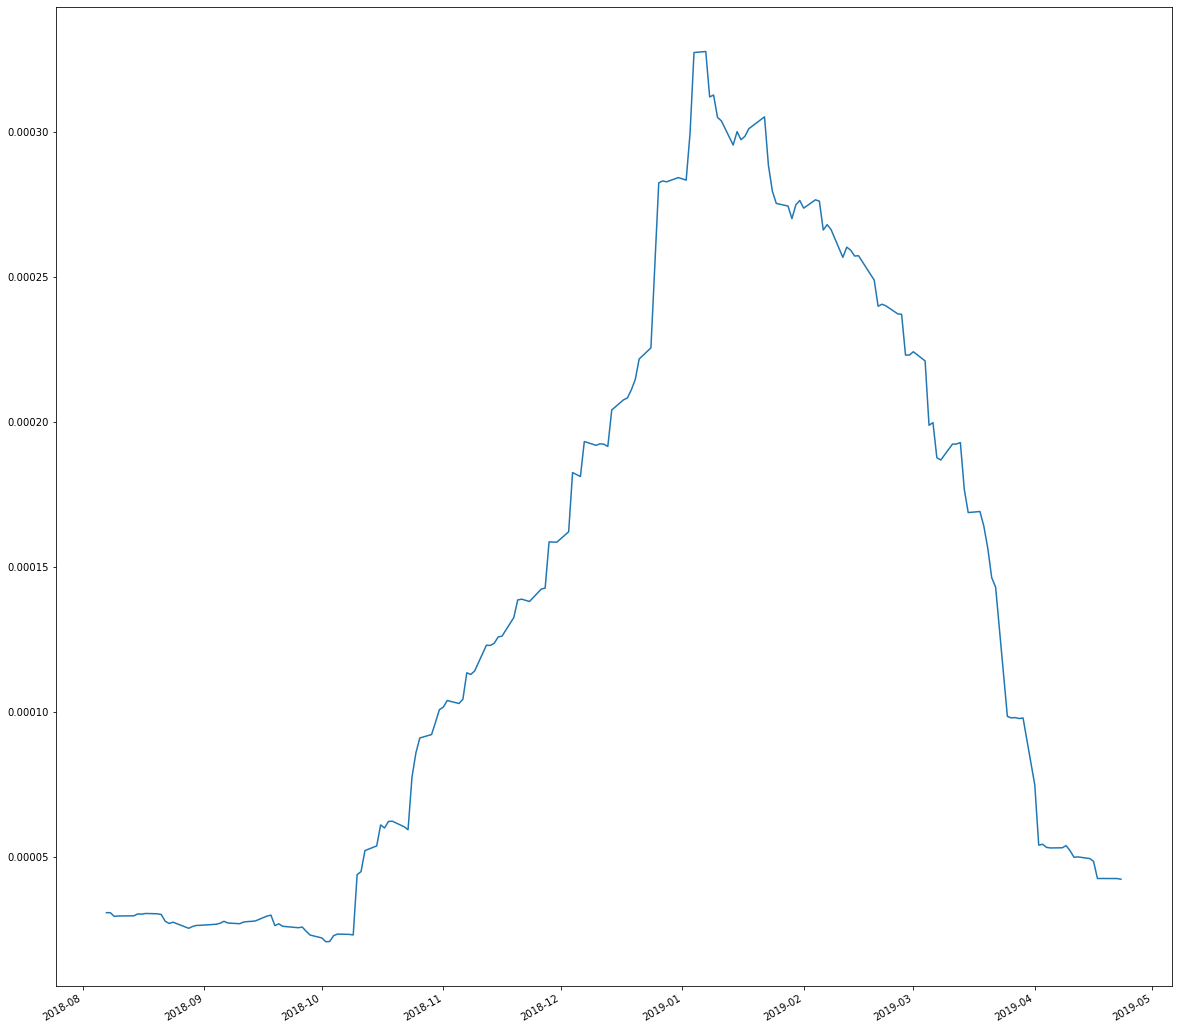

In [74]:
# Calculate and plot Beta
# Calculate covariance of a single portfolio
my_port_covariance = all_summary['My Portfolio'].cov(all_summary['SP500 Close'])
# Calculate variance of S&P 500
variance = all_summary['My Portfolio'].var()
# Computing beta
my_port_beta = my_port_covariance / variance
# Plot beta trend
all_summary['My Portfolio'].rolling(window = 60).cov(all_summary['SP500 Close']).plot(figsize = (20 , 20))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [75]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios = (all_summary.mean() * 252) / (all_summary.std() * np.sqrt(252))
sharpe_ratios.sort_values()

TIGER GLOBAL MANAGEMENT LLC   -1.034216
Algo 2                         0.080607
BERKSHIRE HATHAWAY INC         0.159756
PAULSON & CO.INC.              0.258738
SOROS FUND MANAGEMENT LLC      0.430713
SP500 Close                    0.584820
My Portfolio                   0.933123
Algo 1                         2.035665
dtype: float64

<AxesSubplot:>

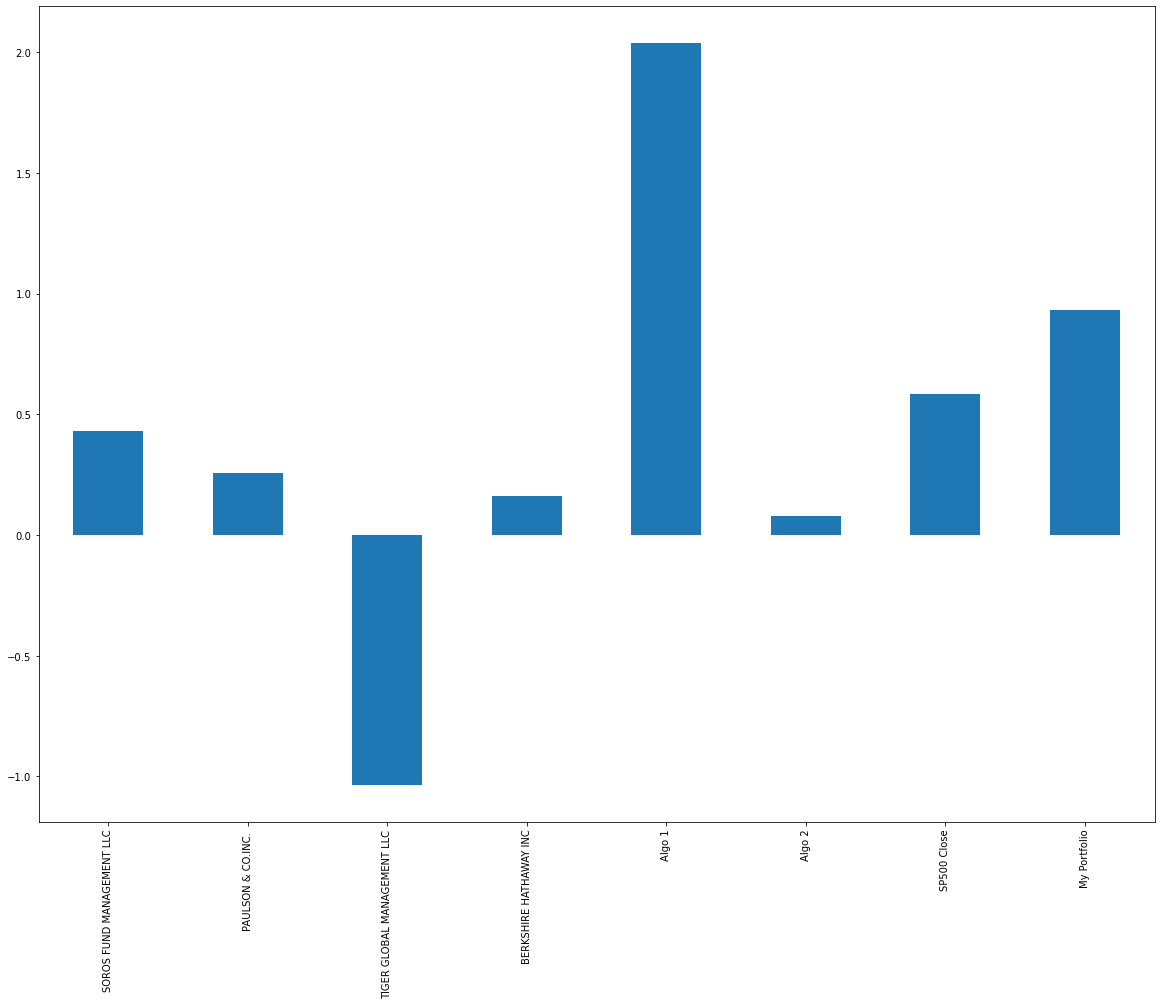

In [77]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = 'bar', figsize = (20,15))

### How does your portfolio do?

Write your answer here!

The portfolio given outperformed the majority of the other portfolios. However, my portfolio could not outperform Algo 1. I'd say the portfolio performed really well regardless of not being the best.  
It followed the S&P500 closely for a long time and for majority of the time it maintained low volatility. Pretty good if you ask me.